# Importing the Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [25]:
df=pd.read_csv("cardio_traindata.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Data Preprocessing

In [26]:
df.shape

(70000, 13)

## 1. Checking for null values 

In [27]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 2. Checking for Datatypes

In [28]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

### The dataset has columns - weight, Height and BMI. However, the BMI column is calculated using the weight and height columns. Hence, the weight and height columns are dropped from the dataset.

In [29]:
df["bmi"] = df["weight"] / ((df["height"] / 100) ** 2)

In [30]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [31]:
#Drop column
df.drop(columns=["height","weight"],inplace=True)

In [32]:
df['age'] = (df['age'] / 365.25).astype(int)

In [33]:
df.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,100,60,1,1,0,0,0,0,23.011177


In [34]:
#Unique values in each column

for i in df.columns:
    print(i,df[i].unique())

id [    0     1     2 ... 99996 99998 99999]
age [50 55 51 48 47 59 60 61 54 40 39 45 58 63 64 53 49 57 56 46 43 62 52 42
 41 44 29 30]
gender [2 1]
ap_hi [  110   140   130   150   100   120   145   170   135   125    90   180
   160   133   190    80   122   169   126   158   200    14   123    70
   161   147   115   137   153    11   148   105   220   119   141   165
   164    12   124   172   902   162   906   117   134   166   210   176
   116    10   121    16   112   159   113   118   155   142   131   157
   136   146   138  -100   909   109    85   106   129    93     7    95
   179   156   168   132   104   103   178   175   128   151    15   139
 11500   127    17   108   144   102     1  1420    13   143   701   107
   184   149   167   114   101    60  1500   181   171   202  -115   111
   907    20   188   185   163   173   154   177  -140   174  -120 14020
  1400   240   191   197  1620   152    96   199  -150  1130   193    99
   196   309   401 16020  1202   806  1300

In [11]:
df.dtypes

id               int64
age              int32
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## Identification of Outliers

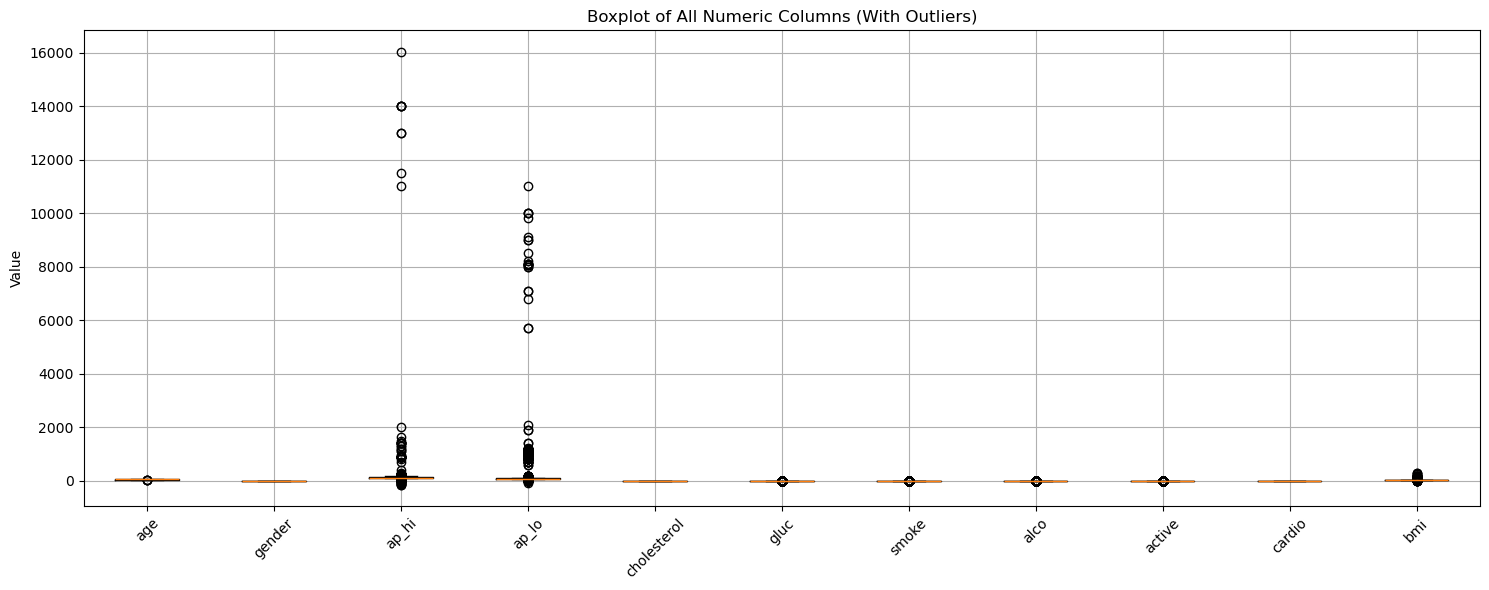

In [35]:

numeric_cols = df.select_dtypes(include=['int64', 'float64',"int32"])
numeric_cols = numeric_cols.drop(columns=['id'], errors='ignore')

plt.figure(figsize=(15, 6))
plt.boxplot([numeric_cols[col].dropna() for col in numeric_cols.columns],
            tick_labels=numeric_cols.columns, 
            showfliers=True)
plt.title('Boxplot of All Numeric Columns (With Outliers)')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()


## Outlier Removal

In [36]:
# columns for outlier removal
#IQR for the selected columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

In [37]:
#Threshold for outlier removal
threshold = 1.5

#Find index of outliers
index = np.where((numeric_cols < (Q1 - threshold * IQR)) | ( numeric_cols > (Q3 + threshold * IQR)))[0]

#Drop outliers
df = df.drop(df.index[index])

In [38]:
df.shape

(38086, 12)

## Descriptive Statistics

In [40]:
df.describe()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.000000,38086.0,38086.0,38086.0,38086.0,38086.000000,38086.000000
mean,50031.430184,52.704826,1.303235,125.671113,81.347293,1.240272,1.0,0.0,0.0,1.0,0.469700,26.834657
std,28817.431736,6.729683,0.459662,14.086076,7.577520,0.564781,0.0,0.0,0.0,0.0,0.499088,4.327767
min,0.000000,39.000000,1.000000,90.000000,65.000000,1.000000,1.0,0.0,0.0,1.0,0.000000,14.479500
25%,25049.500000,48.000000,1.000000,120.000000,80.000000,1.000000,1.0,0.0,0.0,1.0,0.000000,23.767493
50%,49982.000000,53.000000,1.000000,120.000000,80.000000,1.000000,1.0,0.0,0.0,1.0,0.000000,25.970116
75%,75005.500000,58.000000,2.000000,130.000000,90.000000,1.000000,1.0,0.0,0.0,1.0,1.000000,29.410735
max,99999.000000,64.000000,2.000000,170.000000,105.000000,3.000000,1.0,0.0,0.0,1.0,1.000000,39.736121


In [41]:
df.to_csv("cleaned_data.csv")

In [42]:
df.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
6,9,60,1,130,80,3,1,0,0,1,0,37.729725
8,13,48,1,110,70,1,1,0,0,1,0,28.440955
